# Data Loading


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/AbulHasan03/CS381_DataScience/main/imports-85.data'

column_names = [
    "symboling", "normalized_losses", "make", "fuel_type", "aspiration",
    "num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base",
    "length", "width", "height", "curb_weight", "engine_type", "num_cylinders",
    "engine_size", "fuel_system", "bore", "stroke", "compression_ratio",
    "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"
]

df = pd.read_csv(url, names=column_names, na_values='?')
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [110]:
print("\nData Observations and Attributes:", df.shape)
df.info()
print("\nMissing Data:\n", df.isnull().sum())


Data Observations and Attributes: (205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-nu

Some of the columns are missing data such as the normalized_losses, bore, stroke, price, etc. Data will be imputed for the missing values.

## Impute Missing Data

In [111]:
# Numerical data filled with median
num_cols = ['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']
for col in num_cols:
    df[col] = df[col].astype(float)
    df[col] = df[col].fillna(df[col].median())

# Categorical data is filled with data that is the mode
df['num_doors'] = df['num_doors'].fillna(df['num_doors'].mode()[0])


In [112]:
#Transform data from categorical into a numerical form to represent categorical data
df_encoded = pd.get_dummies(df, columns=[
    'make', 'fuel_type', 'aspiration', 'num_doors',
    'body_style', 'drive_wheels', 'engine_location',
    'engine_type', 'num_cylinders', 'fuel_system'
], drop_first=True)

In [113]:
# Stats after data imputation
df.describe(include='all')


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,116,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,120.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329366,3.256098,10.142537,104.165854,5126.097561,25.219512,30.751220,13150.307317
std,1.245307,31.805105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270858,0.313634,3.972040,39.529733,477.035772,6.542142,6.886443,7879.121326
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


# Exploratory Data Analysis

## Cars and their Prices

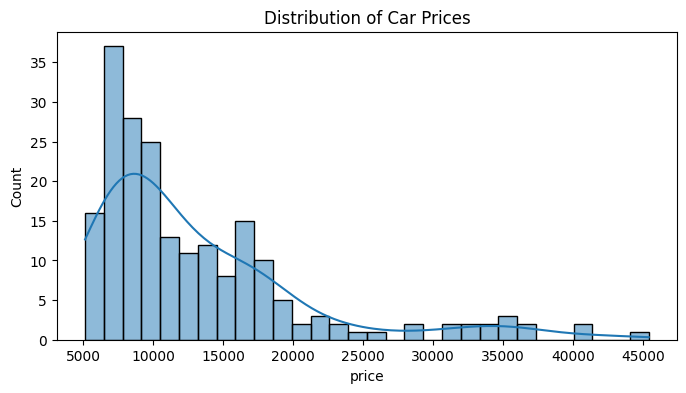

In [114]:
#Histogram representation of cars and their prices
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.show()

The prices of the cars are heavily skewed to the side with most cars being $10,000 or less. More expensive cars are less common.

## Horsepower and Body Style

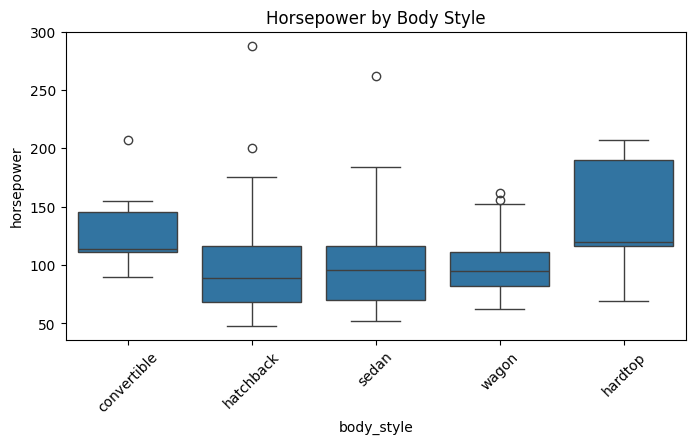

In [115]:
#Boxplot representation of horsepower based on vehicle body style
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='body_style', y='horsepower')
plt.title('Horsepower by Body Style')
plt.xticks(rotation=45)
plt.show()

The body type of the cars seem to have an effect on the horsepower for the car but they can vary a lot as shown by the hatchbacks and convertibles. The mid-style cars such as the sedans and the wagons seem to be more centered.

## Fuel Type

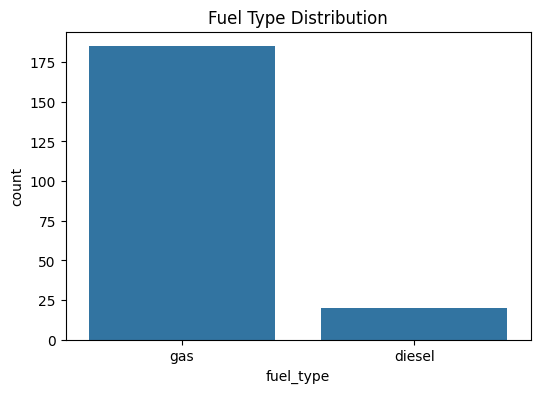

In [116]:
#Bar chart of fuel type
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='fuel_type')
plt.title('Fuel Type Distribution')
plt.show()

Based on the bar chart, diesel fueled cars are not as common in this data set with gas powered cars being well over half of the cars in this set.

## Engine to Price Comparsion

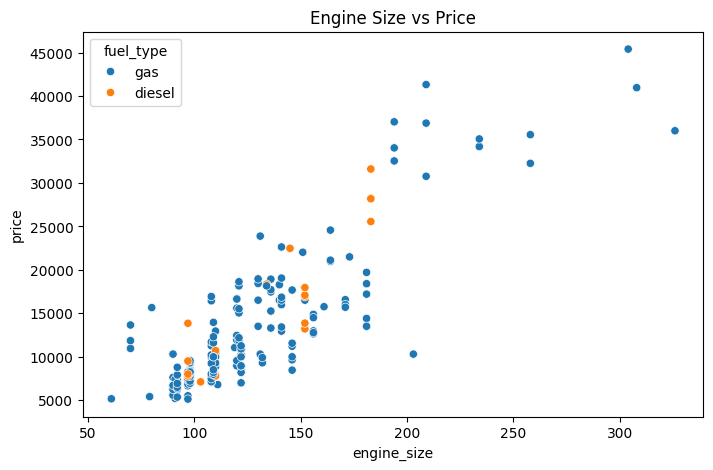

In [117]:
#Scatterplot engine and price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='engine_size', y='price', hue='fuel_type')
plt.title('Engine Size vs Price')
plt.show()

Most of the data consists of smaller engines as they are priced lower and meet the needs of most people. However, as the size of the engines get larger their prices increase also.

## Heatmap

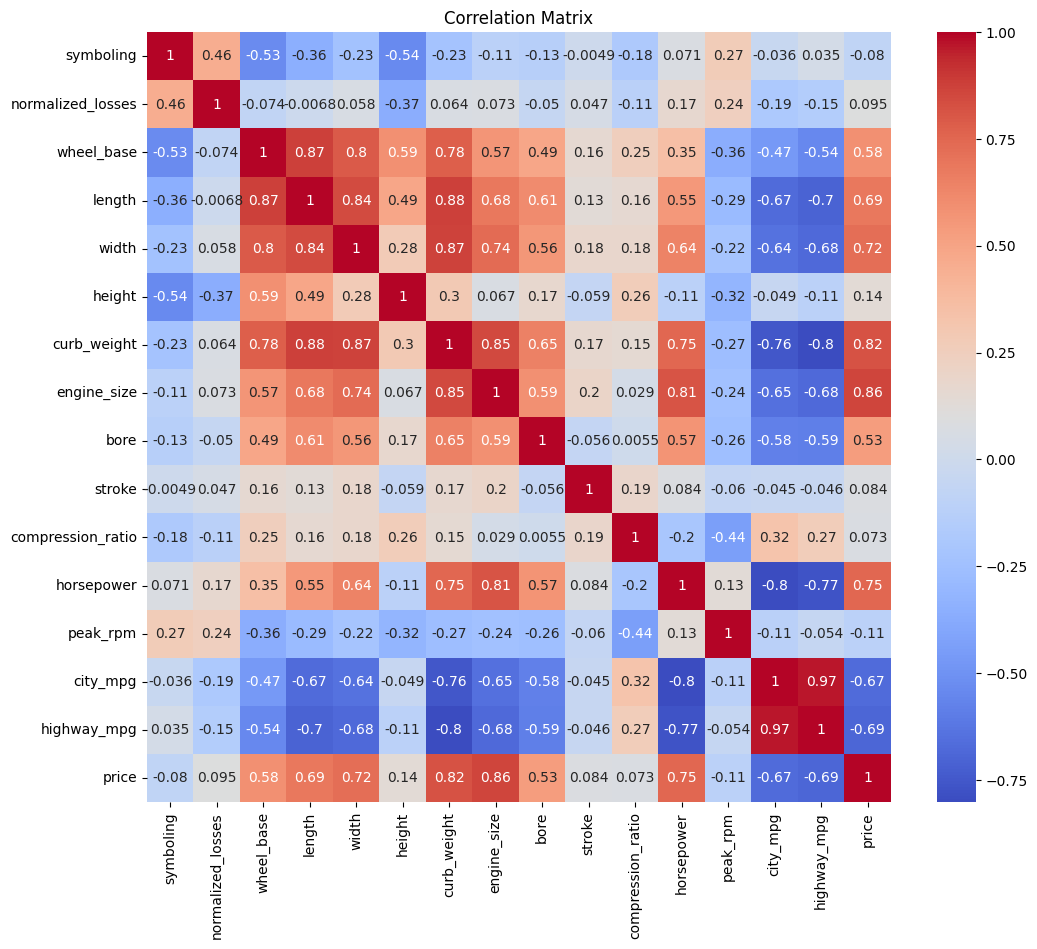

In [118]:
#Correlation Heatmap
plt.figure(figsize=(12, 10))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The price of the cars have positive correlations (in the .80s) with the size of the engine, the weight and size of the vehicle, and the horsepower it can achieve.


# Data Prepation and Feature Engineering

## Which numeric variables contained within the data set appear to require the use of a feature scaling method for purposes of preparing them for use within a machine learning algorithm? Be sure to list each relevant variable and explain why you believe each variable that you’ve identified requires the use of some sort of feature scaling method.

The engine_size, curb_weight, horsepower, peak_rpm, compression_ratio, price, wheel_base, length, width, height, city_mpg, highway_mpg were all the numeric variables that needed to be feature scaled.

These needed to be scaled because they have very different ranges such as the weight being in the thousands while compression value is a single digit entry. Using feature scaling helps to make each variable to have an even effect for things such as the heatmap.

## Consider the number-of-doors and price variables: Based on your EDA work, how many missing data values occur within each of these attributes? As we've learned, missing data values can impede the proper functioning of many machine learning algorithms. To address the missing the number-of-doors and price values, you have been instructed to formulate what you believe will be an effective data imputation approach for purposes of estimating reasonable proxies for the missing data values. Your supervisor tells you that the affected data observations MUST be retained within the data set, and that it would be inappropriate to use either a mean, median, or mode value for any of the missing values since doing so would increase the likelihood of introducing unwarranted bias within the data set. Describe the imputation method you would employ for each variable. Then, using your Python skills, apply your prescribed imputation methods to the variables. Be sure to include graphics and commentary that explain your approach as well as the results of your efforts.

In the data, num_doors had 2 entries missing and price had 4 entries missing.

impute num_doors:
 without using mean, median, or mode, one could impute this based off the car's body style since convertibles are often 2 door and sedans are 4 doors.

In [119]:
#impute doors using body style
door_map = df.groupby("body_style")["num_doors"].agg(lambda x: x.mode()[0])
df.loc[df["num_doors"].isna(), "num_doors"] = df["body_style"].map(door_map)

 impute price:
 since we found earlier that the price is correlated with engine size, weight, and horsepower can be imputed with a regression model.





In [120]:
# Use original data without imputed values to test
url = 'https://raw.githubusercontent.com/AbulHasan03/CS381_DataScience/main/imports-85.data'
df_for_demonstration = pd.read_csv(url, header=None)

# Reassign column names
column_names = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors",
                "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width",
                "height", "curb_weight", "engine_type", "num_cylinders", "engine_size",
                "fuel_system", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
                "city_mpg", "highway_mpg", "price"]
df_for_demonstration.columns = column_names

# Leave ? or empty data with NaN
df_for_demonstration.replace("?", np.nan, inplace=True)
df_for_demonstration["price"] = pd.to_numeric(df_for_demonstration["price"])

# call regression
from sklearn.linear_model import LinearRegression

# Train the model on rows without a price
df_encoded_for_regression = pd.get_dummies(df_for_demonstration.dropna(subset=['price']), drop_first=True)
X_for_regression = df_encoded_for_regression.drop("price", axis=1)
y_for_regression = df_encoded_for_regression["price"]

# Training the regression model
model = LinearRegression()
model.fit(X_for_regression, y_for_regression)

# Demo dataframe to show the regression imputation
df_missing_price_for_demonstration = df_for_demonstration[df_for_demonstration["price"].isna()]

#Encode missing data to be similar to trained feature
df_missing_encoded_for_demonstration = pd.get_dummies(df_missing_price_for_demonstration.drop("price", axis=1), drop_first=True)
df_missing_encoded_for_demonstration = df_missing_encoded_for_demonstration.reindex(columns=X_for_regression.columns, fill_value=0)

# Predict missing prices for demo dataframe
if not df_missing_encoded_for_demonstration.empty:
    predicted_prices = model.predict(df_missing_encoded_for_demonstration)
    df_for_demonstration.loc[df_for_demonstration["price"].isna(), "price"] = predicted_prices

# Show some rows of demo dataframe
display(df_for_demonstration.head())

# Display/check for there to have no missing prices
print("\nMissing 'price' values in demonstration DataFrame after regression imputation:", df_for_demonstration['price'].isna().sum())

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0



Missing 'price' values in demonstration DataFrame after regression imputation: 0


## Consider the engine-size and stroke variables: Describe the specific feature scaling method you would apply to each of them. Then, using Python, generate both a histogram and a boxplot for the original content of these two variables. Next, apply your prescribed feature scaling methods to the two variables and create histograms and boxplots that show the results of your feature scaling efforts. Compare your newly created plots against the plots you created for the original content of the variables. Comment on whether your feature scaling efforts improved the distribution of the data. If your feature scaling efforts did not improve the distribution of the data, explain why you believe your efforts were not effective.

Text(0.5, 0.98, 'After Standard Scaling')

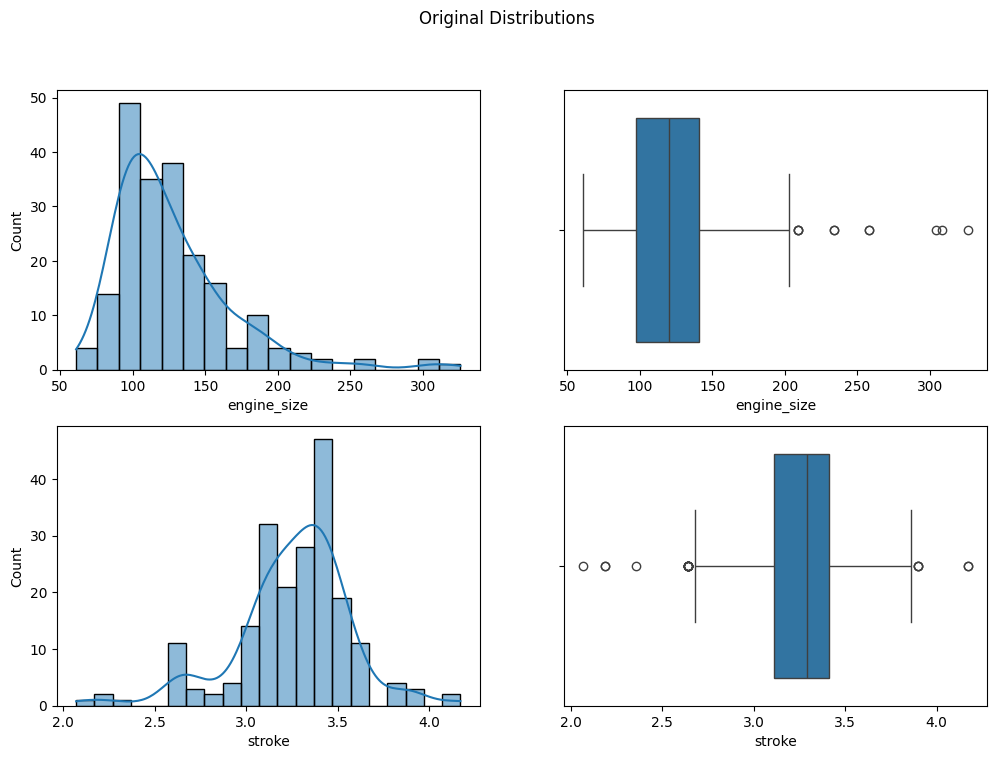

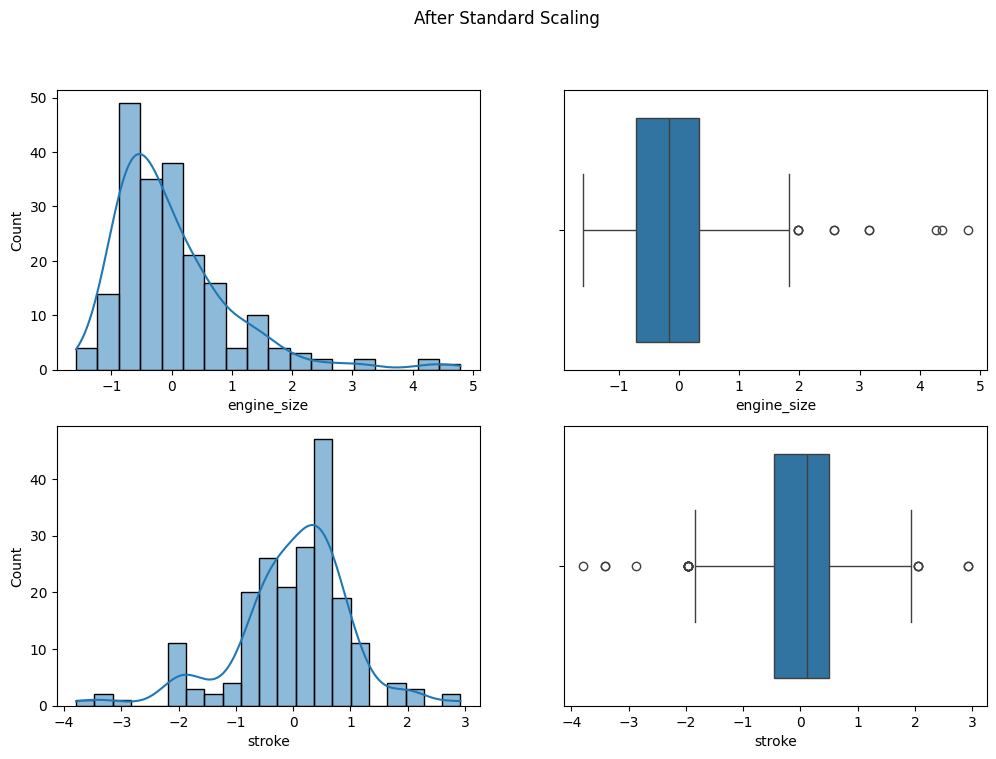

In [121]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Original plot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df["engine_size"], ax=axes[0, 0], kde=True)
sns.boxplot(x=df["engine_size"], ax=axes[0, 1])
sns.histplot(df["stroke"], ax=axes[1, 0], kde=True)
sns.boxplot(x=df["stroke"], ax=axes[1, 1])
plt.suptitle("Original Distributions\n")

# StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[["engine_size", "stroke"]] = scaler.fit_transform(df[["engine_size", "stroke"]])

# Scaled plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df_scaled["engine_size"], ax=axes[0, 0], kde=True)
sns.boxplot(x=df_scaled["engine_size"], ax=axes[0, 1])
sns.histplot(df_scaled["stroke"], ax=axes[1, 0], kde=True)
sns.boxplot(x=df_scaled["stroke"], ax=axes[1, 1])
plt.suptitle("After Standard Scaling")


The shape of the distribution does not get affected but the scale is cenetered at 0, useful for some types of modeling.

## Consider the symboling, make, and engine-type variables:

###  For each variable, specify whether its content is numeric/continuous, numeric/discrete, categorical/nominal, or categorical/ordinal

1.   Symboling would have a numeric typing (discrete, ordinal)
2.   Make would be categorical type (nominal)
3. Engine type would be categorical (nominal type)




###For each variable, describe the methodology you would employ for purposes of preparing its data values for use within a machine learning algorithm.

1.   For symboling it can be kept as it is or normalize since it is already numeric
2.   For make, we can use one-hot encode
3. For engine type, we can also one-hot encode



### Using your Python skills, apply your prescribed data preparation methodologies to the three variables. Be sure to show a sample of your results within your Notebook.

In [122]:
df["symboling_scaled"] = StandardScaler().fit_transform(df[["symboling"]])
df = pd.get_dummies(df, columns=["make", "engine_type"], drop_first=True)

# Sample of the result
df[["symboling", "symboling_scaled"] + [col for col in df.columns if "make_" in col or "engine_type_" in col]].head()


,symboling,symboling_scaled,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,...,make_subaru,make_toyota,make_volkswagen,make_volvo,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor
0,3,1.743470,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,1.743470,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,0.133509,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2,0.938490,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,2,0.938490,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


##Consider the wheel-base, length, width, height, curb-weight, engine-size, compression ratio,horsepower, peak-rpm, and city-mpg variables. Using your dimensionality reduction expertise, use Python to reduce the dimensionality of this group of variables to a set of new orthogonal features. Be sure to include appropriate commentary explaining the dimensionality reduction method you have elected to implement and discuss the results of your efforts. For example, you should explain how many orthogonal features your approach has generated as well as how much variability is explained by each of your new features.

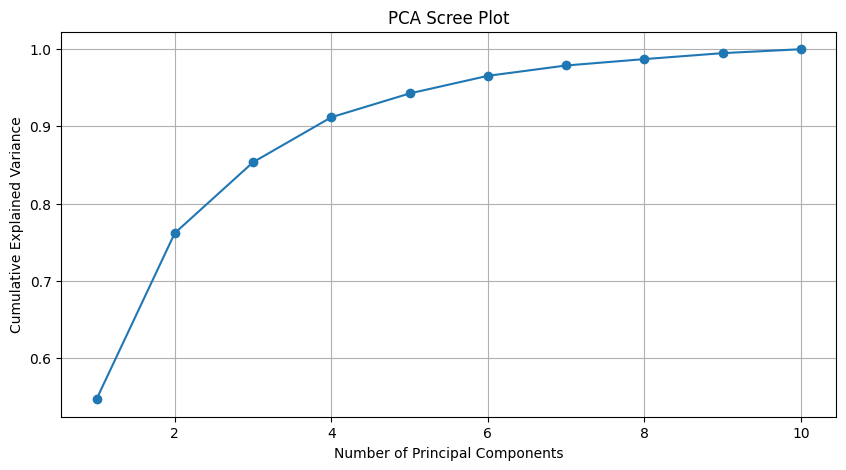

In [123]:
from sklearn.decomposition import PCA

features = ['wheel_base', 'length', 'width', 'height', 'curb_weight',
            'engine_size', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg']
X = StandardScaler().fit_transform(df[features])

pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance
explained_var = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_var)+1), explained_var.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Scree Plot')
plt.grid(True)
plt.show()


The variance can be explained by the first 3 components. Reducing the variables to 3 orthogonal PCA without much lost data.